<a href="https://colab.research.google.com/github/udayPatil45/Computer_Vision_SOC/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Image & Frequency Domain Filtering

In [16]:
# Step 1: Import Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

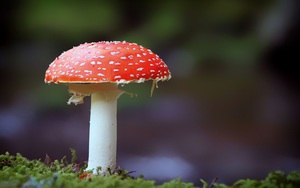

In [25]:
from IPython.display import Image, display
display(Image('mushroom.png'))

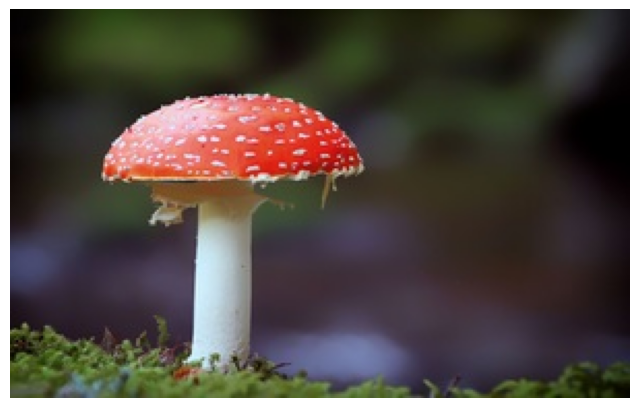

In [24]:
# Load and convert the image from BGR to RGB (OpenCV uses BGR by default)
image = cv2.imread("mushroom.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.show()


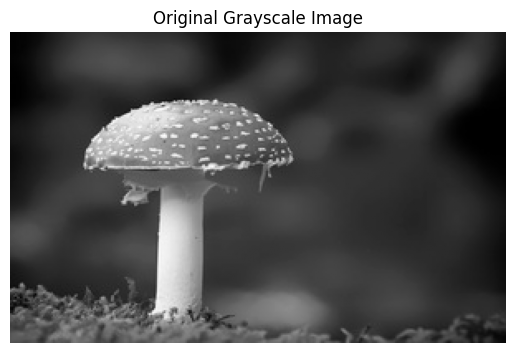

In [7]:
# Step 2: Load Image (Color + Grayscale)

image_color = cv2.imread("mushroom.png")
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
gray_image = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [8]:
# Step 3: Convert to Dictionary Format

def dictionary_conversion(image):
    image_proj = image.flatten()
    return {
        "height": image.shape[0],
        "width": image.shape[1],
        "pixels": image_proj
    }
image_dict = dictionary_conversion(gray_image)

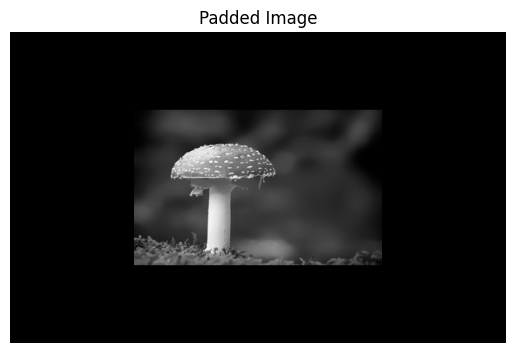

In [9]:
# Step 4: Padding (Symmetric to Double Size)

def padding(image_dict):
    padded = np.zeros((2 * image_dict["height"], 2 * image_dict["width"]))
    original = np.array(image_dict["pixels"]).reshape(image_dict["height"], image_dict["width"])
    h, w = image_dict["height"], image_dict["width"]
    padded[h//2:h//2 + h, w//2:w//2 + w] = original
    return padded

padded_image = padding(image_dict)

plt.imshow(padded_image, cmap='gray')
plt.title("Padded Image")
plt.axis('off')
plt.show()

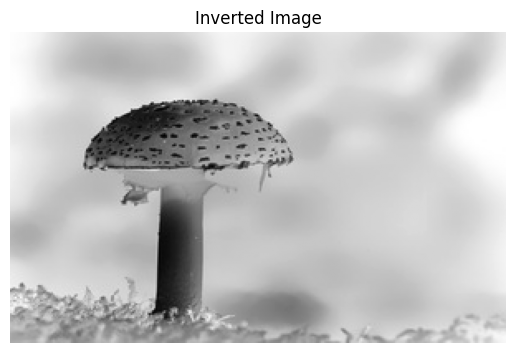

In [10]:
# Step 5: Inversion Filter

def inverted(image):
    return 255 - image

inverted_image = inverted(gray_image)

plt.imshow(inverted_image, cmap='gray')
plt.title("Inverted Image")
plt.axis('off')
plt.show()


In [11]:
# Step 6: Frequency Domain Filters

def gaussian_lowpass_filter(shape, sigma):
    h, w = shape
    y, x = np.ogrid[:h, :w]
    center = (h//2, w//2)
    distance = (x - center[1])**2 + (y - center[0])**2
    return np.exp(-distance / (2 * sigma * sigma))

def butterworth_lowpass_filter(shape, D0, n):
    h, w = shape
    y, x = np.ogrid[:h, :w]
    center = (h//2, w//2)
    D = np.sqrt((x - center[1])**2 + (y - center[0])**2)
    return 1 / (1 + (D / D0)**(2 * n))

def laplacian_filter(shape):
    h, w = shape
    y, x = np.ogrid[:h, :w]
    center = (h//2, w//2)
    u = x - center[1]
    v = y - center[0]
    laplacian = -4 * (np.pi**2) * (u**2 + v**2)
    return laplacian


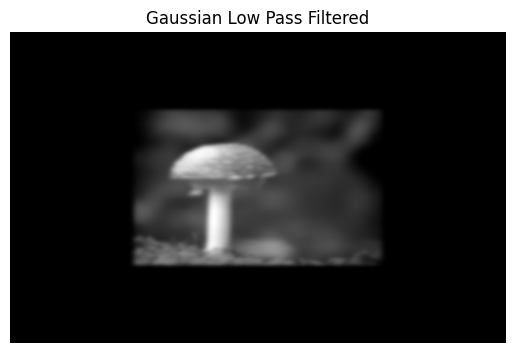

In [12]:
# Step 7: Apply Frequency Domain Processing

def apply_frequency_filter(image, filter_mask):
    F = np.fft.fft2(image)
    F_shifted = np.fft.fftshift(F)
    G = F_shifted * filter_mask
    G_ishift = np.fft.ifftshift(G)
    result = np.fft.ifft2(G_ishift)
    return np.abs(result)

# Apply Gaussian Low Pass
gaussian_mask = gaussian_lowpass_filter(padded_image.shape, sigma=30)
gaussian_filtered = apply_frequency_filter(padded_image, gaussian_mask)

plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Low Pass Filtered")
plt.axis('off')
plt.show()


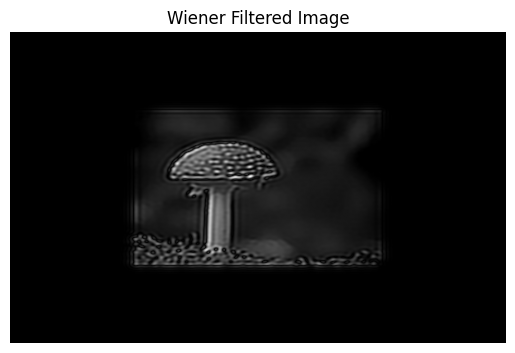

In [13]:
# Step 8: Noise Removal with Wiener Filtering

def wiener_filter(image, H, K):
    G = np.fft.fft2(image)
    G_shifted = np.fft.fftshift(G)
    H_conj = np.conj(H)
    wiener = (H_conj / (np.abs(H)**2 + K)) * G_shifted
    wiener_ishift = np.fft.ifftshift(wiener)
    result = np.fft.ifft2(wiener_ishift)
    return np.abs(result)

# Using Gaussian as degradation function
K = 0.01  # noise-to-signal ratio
wiener_result = wiener_filter(padded_image, gaussian_mask, K)

plt.imshow(wiener_result, cmap='gray')
plt.title("Wiener Filtered Image")
plt.axis('off')
plt.show()

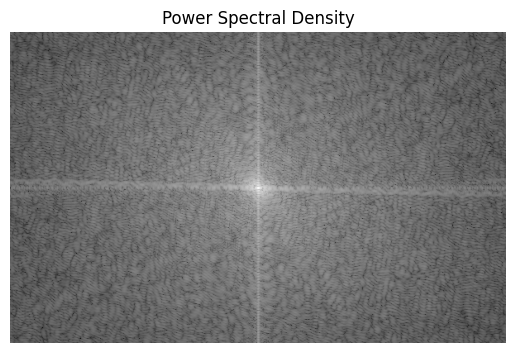

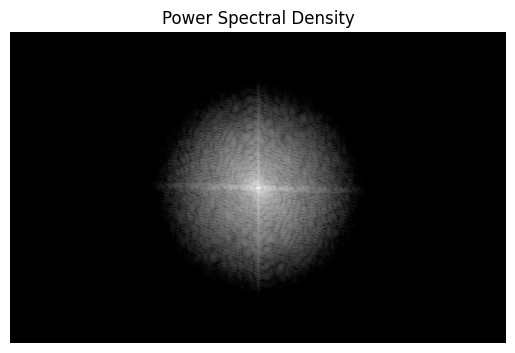

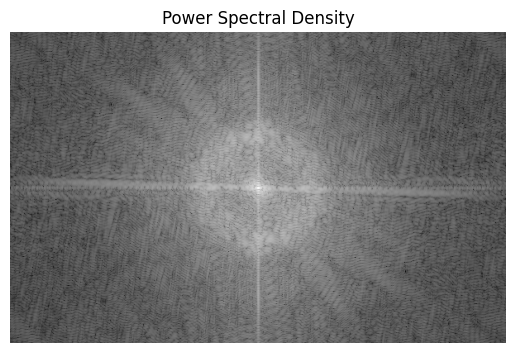

In [14]:
# Step 9: Power Spectral Density

def power_spectral_density(fourier_image):
    magnitude_spectrum = np.log(np.abs(fourier_image)**2 + 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Power Spectral Density")
    plt.axis('off')
    plt.show()

# Visualize original
original_fft = np.fft.fftshift(np.fft.fft2(padded_image))
power_spectral_density(original_fft)

# Visualize Gaussian filtered
filtered_fft = np.fft.fftshift(np.fft.fft2(gaussian_filtered))
power_spectral_density(filtered_fft)

# Visualize Wiener filtered
wiener_fft = np.fft.fftshift(np.fft.fft2(wiener_result))
power_spectral_density(wiener_fft)

